# <center>_HEART DISEASE PREDICTION_</center>

In [1]:
# Import Necessary packages
import pandas as pd
import numpy as np5c 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
#Read the dataset
data = pd.read_csv('heart.csv')
data.shape

(303, 14)

## _Data Description_
<b>age</b> - age in years <br />
<b>sex</b> - (1 = male; 0 = female)<br />
<b>cp</b> - chest pain type <br />
        -- Value 0: typical angina <br />
        -- Value 1: atypical angina <br />
        -- Value 2: non-anginal pain <br />
        -- Value 3: asymptomatic  <br />
<b>trestbps</b> - resting blood pressure (in mm Hg on admission to the hospital) <br />
<b>chol</b> - serum cholestoral in mg/dl <br />
<b>fbs</b> - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) <br />
<b>restecg </b> - resting electrocardiographic results <br />
        -- Value 0: showing probable or definite left ventricular hypertrophy by Estes' criteria <br />
        -- Value 1: normal <br />
         -- Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) <br />
<b>thalach</b> - maximum heart rate achieved <br />
<b>exang</b>- exercise induced angina (1 = yes; 0 = no) <br />
<b>oldpeak</b> - ST depression induced by exercise relative to rest <br />
<b>slope </b>- the slope of the peak exercise ST segment <br />
    0: downsloping; 1: flat; 2: upsloping <br />
<b>ca</b> - number of major vessels (0-3) colored by flourosopy <br />
<b>thal</b> - 0-null , 1 = normal; 2 = fixed defect; 3 = reversable defect (Results of the blood flow observed) <br />
 
Value 0: NULL (dropped from the dataset previously) <br />
Value 1: fixed defect (no blood flow in some part of the heart) <br />
Value 2: normal blood flow  <br />
Value 3: reversible defect (a blood flow is observed but it is not normal) <br />
<b>target</b> - have disease or not (1= NO disease, 0= disease) <br />

### _Categorical features_
    1) Sex  2) cp  3) fbs 4)restecg  5)exang  6) slope 7)ca 8) thal 9) target
    
### _Numerical features_
    1) age 2)trestbps 3) chol 4)thalach 5) oldpeak 

In [32]:
data[data['chol']>280]['target'].value_counts()

0    41
1    29
Name: target, dtype: int64

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### _Observations:_

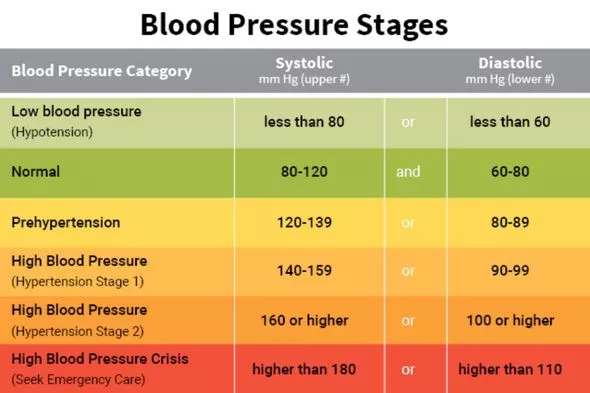
<b>trestbps</b> - resting blood pressure (in mm Hg on admission to the hospital). So this is Systolic blood presure <br />
- Their are no patients with low blood presure.
- 25% of the patients were completely normal
- 75% of the patients were comletely normal/ pre hypertension
- 25% of the patients have high blood presure and higher than that.
<b>chol</b> 
# Complete this later..

In [7]:
#Checking  for null values.
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
#Checking whether imbalance dataset
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [9]:
#Correlation between target and others
data.corr()['target'].sort_values(ascending = False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

<b>_Observation_</b>
- The type of chest pain is may play major role in predicting the heart disease.
- Maximum heart beat achieved also plays major role next to cp

### _Data Exploration_

In [10]:

plt.figure(figsize = (20,15))
plt.subplot(3,2,1)
plt.title('patients with & without heart disease')
sns.countplot(x = 'target', data = data)
plt.subplot(3,2,2)
plt.title('Gender VS target')
sns.countplot(x = 'sex', data = data, hue = 'target')
plt.xlabel('0 - Female &   1-Male')
plt.subplot(3,2,3)
plt.title('Type of chest Pain')
sns.countplot(x = 'cp', data = data, hue = 'target')
plt.xlabel('0: typical angina, 1: atypical angina, 2: non-anginal pain, 3: asymptomatic')
plt.subplot(3,2,4)
plt.title('Exercise induced Angina')
sns.countplot(x = 'exang', data = data, hue = 'target')
plt.xlabel('0 - No &   1-yes')
plt.subplot(3,2,5)
plt.title('No of major vessels')
sns.countplot(x = 'ca', data = data, hue='target')
plt.subplot(3,2,6)
plt.title('Results of blood flow observed')
sns.countplot(x = 'thal', data = data, hue = 'target')


<AxesSubplot:title={'center':'Results of blood flow observed'}, xlabel='thal', ylabel='count'>

### _Observations_
- Patients with heart disease are less than without heart disease.
- Male's are affected more than female.
- Patients with Typical angina pain are likely to have heart disease.
- Exercise induced Angina most probably have heart disease.
- If atleat one blood vessels shown in fluroscopy then likely to have heart disease.
- <b>Fixed defect</b> (value 2) is normal we can see from the diagram and <b>reversible defect</b> is not normal so likely to have heart disease.

### Modeling

In [11]:
x_train, x_test, y_train, y_test = train_test_split(data.drop(['target'], axis = 1), data['target'], test_size = 0.2, random_state=5)

In [12]:
lg = LogisticRegression().fit(x_train, y_train)

C:\Users\ajayr\anaconda3\envs\heartprediction\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
res = lg.predict(x_test)

In [14]:
res

array([0], dtype=int64)

In [17]:
print(classification_report(y_test, res))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92        30
           1       0.91      0.94      0.92        31

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



In [19]:
import pickle
# open a file, where you ant to store the data
file = open('logistic_regression.pkl', 'wb')

# dump information to that file
pickle.dump(lg, file)

In [20]:
file.close()